Joshua Moe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

# Final Project

## Submit your plots, descriptions, and python scripts including all of your functions.

## 1. (20 points) Linear regression
### Implement gradient descent-based linear regression in Python. Use ∆J = 0.00001 as the stopping criterion.

In [2]:
class LinReg:
    
    # TO DO: Find the formula for the line of the Linear Regression: h(Θzero) = Θzero + Θone * x  
    def DoLinReg(self, dataset, independent, dependent):
        
        self.dataset = dataset
        self.independent = independent
        self.dependent = dependent
        
        data = pd.read_csv(self.dataset)
        X_values = data.loc[:,self.independent]
        Y_values = data.loc[:,self.dependent]
       
        if len(X_values) != len(Y_values):
            print("Error: missing data point. The number of X-values and Y-values are not equal!")
            return
        
        
        learning_rate = 0.01
        delta_J = 0.00001
        limit_counter = 0
        limit_until_abort = 5000
        
        # initial values
        Θzero = 1
        Θone = 1
        
        temp_Θzero = 0
        temp_Θone = 0
        
        m = data.shape[0]
        
        while(True):
            
            deriv_Θzero = (1/m)*sum([(Θzero + X_values[p]*Θone - Y_values[p]) for p in range(0,m)])
            deriv_Θone = (1/m)*sum([(Θzero + X_values[q]*Θone - Y_values[q])*X_values[q] for q in range(0,m)])
            
            temp_Θzero = temp_Θzero - (learning_rate*deriv_Θzero)
            temp_Θone = temp_Θone - (learning_rate*deriv_Θone)
            
            if ((abs(Θzero - temp_Θzero) < delta_J) and (abs(Θone - temp_Θone) < delta_J)):
                break
            else:
                Θzero = temp_Θzero
                Θone = temp_Θone
                
            limit_counter += 1
            if limit_counter >= limit_until_abort:
                print("Limit reached.")
                break
        
        results = [Θzero,Θone]
        
        return results
            
        
            
            
        
        

## This is me testing my LinReg class

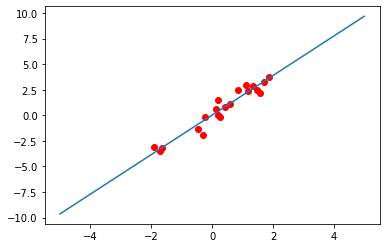

In [3]:
# Running my LinReg class
Question_1_test = LinReg()
Q1 = Question_1_test.DoLinReg("./linear_regression_test_data.csv","x","y")

# Getting the x and y values
file = "./linear_regression_test_data.csv"
data = pd.read_csv(file)
x_val = data.loc[:,"x"]
y_val = data.loc[:,"y"]

my_X = []
for i in x_val:
    my_X.append(i)
my_Y = []
for i in y_val:
    my_Y.append(i)
    
# Getting two points from my Θzero and Θone return values to create a linear regression line
                            # h(Θzero) = Θzero + Θone * x
delta0 = Q1[0]
delta1 = Q1[1]

my_x_results = [-5,5]
my_y_results = [delta0 + delta1*(-5), delta0 + delta1*5]

plt.plot(my_X,my_Y,"ro")
plt.plot(my_x_results,my_y_results)
plt.show()

## 2. (20 points) Logistic regression
### Implement gradient descent-based logistic regression for classification in Python. Use ∆J = 0.00001 as the stopping criterion. Use setosa and virginica in the iris dataset for writing and debugging your code.

In [4]:
class LogReg:
    
    def DoLogReg(self, dataset, file, category):
        
        self.dataset = dataset
        self.category = category
        self.file = file
        
        # Formatting the dataset
        zero = self.category[0]
        one = self.category[1]
        
        if self.file == True:
            data = pd.read_csv(self.dataset)
        else:
            data = self.dataset
            
        category_data = list(data.iloc[:,data.shape[1]-1])
        Y_values = []
        for i in category_data:
            if i == zero:
                Y_values.append(0)
            elif i == one:
                Y_values.append(1)
        
        # Creating a new dataset where the class data is formatted in "0" and "1"
        data2 = data.iloc[:, :-1]
        data2["category"] = Y_values
        
        # Finding "Θ"
        learning_rate = 0.01
        delta_J = 0.00001
        #delta_J = 0.001 #Testing my exit condition, it works!
        limit_counter = 0
        limit_until_abort = 1000  
        e = math.e
        
        # initial values   
        m = data.shape[0]
        
        Θvector = []
        for i in range(0,data2.shape[1]-1):
            Θvector.append(1)
            
        Θvector = np.asmatrix(Θvector)
        #print("inital Θvector",Θvector)
        #print(Θvector.shape)
        #print(Θvector.T.shape)
        temp_Θvector = [0 for i in range(0,data2.shape[1]-1)]
        
        
        Cost = []
        interation = []
        
        while(True):
            
            delta_j_stop = 0
            
            
            for j in range(0,data2.shape[1]-1):
                Θvector_T = Θvector.T
                deriv_Θj = (1/m)*sum([((1/(1 + e**(-(np.matmul(data2.iloc[p,0:data2.shape[1]-1],Θvector_T))))) - Y_values[p])*data2.iloc[p,j] for p in range(0,m)])
                temp_Θvector[j] = Θvector[0,j] - learning_rate*deriv_Θj
            
            
            
            for g in range(0,data2.shape[1]-1):
                if (abs(Θvector[0,g] - temp_Θvector[g]) < delta_J):
                    delta_j_stop += 1
            
            
           
            if delta_j_stop == (data2.shape[1]-1):
                break
            else:
                Θvector = np.asarray(Θvector)[0].tolist()
                
                for h in range(0,data2.shape[1]-1):
                    Θvector[h] = temp_Θvector[h]
                    #if(limit_counter == 0):
                    #    print("temp",temp_Θvector[h])
                    #    print("non-temp",Θvector[h]) #[0,h]
                
                Θvector = np.asmatrix(Θvector).T
                
              
            limit_counter += 1
            
            """ 
            I cannot graph the Cost_function vs Interation because of the error: ValueError: math domain error.
            This error occurs because at some point math.log("some number", 10) will take the Log10 of a negative number,
            where either hΘ(X^(i)) or hΘ(1 - X^(i)) is negative during the process of Gradient Descent.
            
            cost_at_x = -(1/m)*sum([Y_values[i]*math.log(np.matmul(data2.iloc[i,0:data2.shape[1]-1],Θvector.T),10) + (1 - Y_values[i])*math.log(np.matmul(data2.iloc[i,0:data2.shape[1]-1],Θvector.T),10) for i in range(0,m)])
            Cost.append(cost_at_x)
            interation.append(limit_counter)
            """
            
            if limit_counter >= limit_until_abort:
                print("Limit reached. Interation done: " + str(limit_counter))
                break
        
        results = np.asarray(Θvector)[0].tolist()
        
        """
        fig, ax = plt.subplots()
        ax.plot(interation,Cost)
        ax.set_xlabel("Interation")
        ax.set_ylabel("Cost")
        ax.set_aspect('equal')
        fig.show()
        """
        
        
        return results
        

### Note: I cannot find a suitible 'learning rate'. When I change delta_J to 0.001 (from 0.00001) the learning rate of 0.01 will work.

In [5]:
Question_2_test = LogReg()
Q2 = Question_2_test.DoLogReg("./iris_MODIFIED_setosa_and_virginica_ONLY.csv", True, ["Iris-setosa","Iris-virginica"])

Limit reached. Interation done: 1000


In [6]:
Q2

[-0.7340803866357711,
 -0.5560164776715248,
 1.3621756839310057,
 1.3202421674675064]

## 3. (20 points) PCA and linear regression

In [7]:
class PCA:
    
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
        
    def DoPCA(self, matrix, transposed):
        self.matrix = matrix
        self.transposed = transposed
        
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt
        
        ### New
        if self.transposed == True:
            matrix = self.matrix.T
        else:
            matrix = self.matrix
        ###
        
        #matrix = pd.read_csv(self.matrix)
        
        # (1) Do mean centering
        #meanCenteredData = self.matrix - np.mean(self.matrix, axis=0)
        column_mean = matrix.mean(axis=0)
        column_mean_stacked = np.tile(column_mean, reps=(matrix.shape[0], 1))
        meanCenteredData = matrix - column_mean_stacked
        
        # (2) Compute the covariance matrix using numpy.cov()
      
        covMatrix = np.cov(meanCenteredData, rowvar=False)
        
        # (3) Perform eigen-decomposition using numpy.linalg.eig()
        w,v = np.linalg.eig(covMatrix)
        w = w.real
        v = v.real
        
        sortIndex = w.argsort()[::-1]
        eigenvalues = w[sortIndex]
        eigenvectors = v[:,sortIndex]
        
        """
        # (4). Project the data onto the principal component axes.
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.set_title('Raw Data and PC Axis')
        ax.scatter(meanCenteredData.iloc[:,0], meanCenteredData.iloc[:,1], color='blue')
        k=20
        ax.plot([0, (-1)*k*eigenvectors[0,0]], [0, (-1)*k*eigenvectors[1,0]],
            color='red', linewidth=3)
        ax.plot([0, k * eigenvectors[0, 1]], [0, k * eigenvectors[1, 1]],
            color='red',linewidth=3)
        ax.set_aspect('equal', 'box')
        fig.show()
        """
        # (5). Return the variance and percent variance that each PC explains, all of the scores, and loadings.
        percent_variance = (eigenvalues / sum(eigenvalues)) * 100
        scores = np.matmul(meanCenteredData, eigenvectors)
        
        results = {'variance' : eigenvalues,
                   'percent variance' : percent_variance,
                   'scores' : scores,
                   'loadings' : eigenvectors}
        return results

### (1) (30 points) The data in linear regression test data.csv contains x, y, and y−theoretical. Perform PCA on x and y. Plot y vs x, y-theoretical vs x, and the PC1 axis in the same plot.

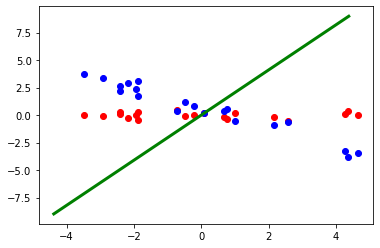

In [8]:
linRegData = pd.read_csv("./linear_regression_test_data.csv")
linRegData_v2 = linRegData[["x","y"]]

# PCA
Question_3a = PCA()
Q3a = Question_3a.DoPCA(linRegData_v2, False)
X_pca = Q3a["scores"]
X_pca = list(X_pca.iloc[:,0])
Y_pca = Q3a["scores"]
Y_pca = list(Y_pca.iloc[:,1])

# Getting y_theoretical
y_theoretical = list(linRegData["y_theoretical"]) 

# Plotting
k = 10
eigenvectors = Q3a['loadings']

plt.plot(X_pca, Y_pca, "ro")
plt.plot(X_pca, y_theoretical, "bo")
plt.plot([k*eigenvectors[0,0], (-1)*k*eigenvectors[0,0]], [k*eigenvectors[1,0], (-1)*k*eigenvectors[1,0]], color='green', linewidth=3)
plt.show()

### (2) (30 points) Perform linear regression on x and y with x being the independent variable and y being the dependent variable. Plot the regression line in the same plot as you obtained in (1). Compare the PC1 axis and the regression line obtained above. Are they very different or very similar? Could you explain why this happens?

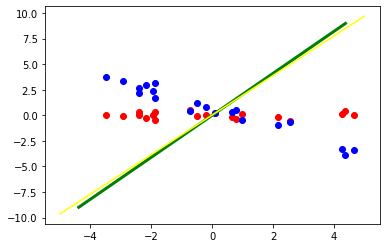

In [9]:
# Running my LinReg class
Question_3b = LinReg()
Q3b = Question_3b.DoLinReg("./linear_regression_test_data.csv","x","y")

# Getting two points from my Θzero and Θone return values to create a linear regression line
                            # h(Θzero) = Θzero + Θone * x
Q3delta0 = Q3b[0]
Q3delta1 = Q3b[1]

my_x_results = [-5,5]
my_y_results = [Q3delta0 + Q3delta1*(-5), Q3delta0 + Q3delta1*5]

plt.plot(X_pca, Y_pca, "ro")
plt.plot(X_pca, y_theoretical, "bo")
plt.plot([k*eigenvectors[0,0], (-1)*k*eigenvectors[0,0]], [k*eigenvectors[1,0], (-1)*k*eigenvectors[1,0]], color='green', linewidth=3)
plt.plot(my_x_results,my_y_results,color="yellow")
plt.show()

The resulting figure above shows that the PC1 axis and the Linear Regression line are very similar, they almost perfectly overlap. To answer the question as to why this is the case, the PC1 axis is the axis that accounts for the most variance in the dataset that determines the outcome, and the Linear Regression line method to best predict outcome (dependent varaible) using an input (the independent variable). Both, by their respective definitions, would naturally be similar to one another.

## 4. (40 points)
### Apply PCA, kmeans clustering, hierarchical clustering, linear regression, LDA, logistic regression, and ANN in sklearn to the heart disease dataset at the UCI Machine Learning Repository and describe what you could find about the data. Use Jupyter notebook to show both your code and plots.

### The data and the description of the data can be found here: Heart Disease Dataset. Use the processed.clevand.data that you can download here: Download the Heart Disease Dataset.

### When you apply LDA, logistic regression, and ANN, consider the problem as a binary classification problem to distinguish presence from absence of heart disease. When you apply linear regression, look for variables that are strongly correlated. When you apply clustering, do you see certain patients group together. Describe in detail what you find.


I edited the processed.cleveland.data by converting it to a csv file, naming the columns, and removing rows (88, 167, 193, 267, 288, and 303) for missing values in column (13, 12, 12, 13, 12, and 12) respectively.

In [10]:
cleaned_data = pd.read_csv("./processed.cleveland.cleaned.csv")
cleaned_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


Here are what each column represents:
1. (age)
2. (sex)
3. (cp) chest pain type
    1 = typical angina
    2 = atypical angina
    3 = non-anginal pain
    4 = asymptomatic
4. (trestbps) resting blood pressure (in mm Hg on admission to the hospital)
5. (chol) serum cholestoral in mg/dl
6. (fbs) (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. (restecg) resting electrocardiographic results: 
    0 = normal 
    1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
8. (thalach) maximum heart rate achieved
9. (exang) exercise induced angina (1 = yes; 0 = no)
10. (oldpeak) ST depression induced by exercise relative to rest
11. (slope) the slope of the peak exercise ST segment
    1 = upsloping
    2 = flat
    3 = downsloping
12. (ca) number of major vessels (0-3) colored by flourosopy
13. (thal) 3 = normal; 6 = fixed defect; 7 = reversable defect
14. (num) (the predicted attribute) diagnosis of heart disease (angiographic disease status)
    0 < 50% diameter narrowing
    1 > 50% diameter narrowing

### First, I will preform PCA on the dataset, but excluding columns 2, 3, 6, 7, 9, 11, 13, and 14 (since the values in these columns are categorical)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
cleaned_data_noncategorical = cleaned_data.iloc[:,[0,3,4,7,9,11]] #cleaned_data.iloc[:,[0,1,3,4,7,9,11]]

In [13]:
rows = cleaned_data_noncategorical.index.values
columns = cleaned_data_noncategorical.columns.values

data_for_analysis_standardized = StandardScaler(with_mean=True, with_std=True).fit_transform(cleaned_data_noncategorical)
num_of_components = min(cleaned_data_noncategorical.shape[0], cleaned_data_noncategorical.shape[1])
object_PCA = PCA(n_components=num_of_components)
PCA_fit_results = object_PCA.fit(data_for_analysis_standardized)

#### Scree Plot

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


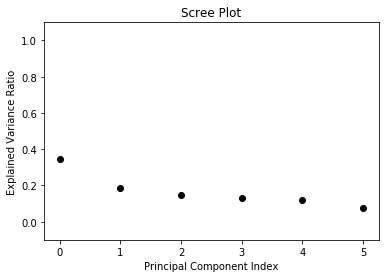

In [14]:
fig, ax = plt.subplots()
ax.scatter(range(len(PCA_fit_results.explained_variance_ratio_)),
    PCA_fit_results.explained_variance_ratio_,
    color='black')
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel("Principal Component Index")
ax.set_ylabel("Explained Variance Ratio")
ax.set_title("Scree Plot")
fig.show()

From my Scree Plot, it seems that I can reduce the dimentions of the data from 7 to 3 (PC1, PC2, and PC3).

#### Scores Plot

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


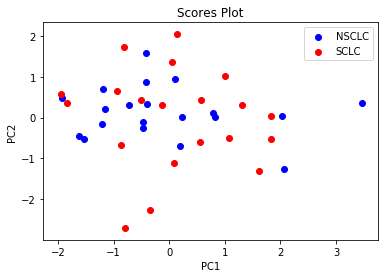

In [15]:
PCA_scores = object_PCA.fit_transform(data_for_analysis_standardized)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(PCA_scores[0:20, 0], PCA_scores[0:20, 1], color='blue', label='NSCLC')
ax.scatter(PCA_scores[20:40, 0], PCA_scores[20:40, 1], color='red', label='SCLC')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Scores Plot')
ax.legend()
fig.show()

There are no defined groups.

#### Loadings Plot

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


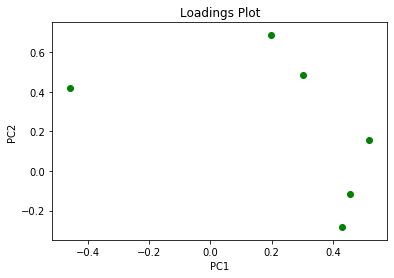

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(PCA_fit_results.components_[0, :], PCA_fit_results.components_[1, :], color='green')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Loadings Plot')
fig.show()

### K-means Clustering

In [17]:
from sklearn.cluster import KMeans

In [18]:
color_theme = np.array(['red','blue'])
clustering = KMeans(n_clusters=2, random_state=1)
clustering.fit(cleaned_data_noncategorical)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


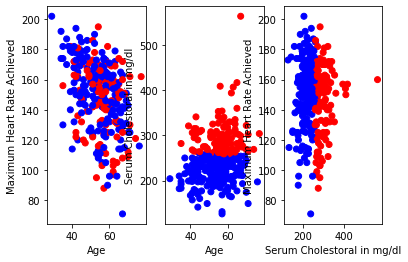

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.scatter(x=cleaned_data_noncategorical.age, y=cleaned_data_noncategorical.thalach, c=color_theme[clustering.labels_])
ax1.set_xlabel("Age")
ax1.set_ylabel("Maximum Heart Rate Achieved")

ax2.scatter(x=cleaned_data_noncategorical.age, y=cleaned_data_noncategorical.chol, c=color_theme[clustering.labels_])
ax2.set_xlabel("Age")
ax2.set_ylabel("Serum Cholestoral in mg/dl")

ax3.scatter(x=cleaned_data_noncategorical.chol, y=cleaned_data_noncategorical.thalach, c=color_theme[clustering.labels_])
ax3.set_xlabel("Serum Cholestoral in mg/dl")
ax3.set_ylabel("Maximum Heart Rate Achieved")

fig.show()

As a result of KMeans Clustering, I was able to cluster the data into two groups (2 groups based "num"--diagnosis of heart disease). 

I wanted to see how "Age x Maximum Heart Rate Achieved" grouped and how "Age x Serum Cholestoral in mg/dl" grouped and how "Serum Cholestoral in mg/dl x Maximum Heart Rate Achieved". 

From my plots, there seems to be no defined clusters for "Age x Maximum Heart Rate Achieved", but for my "Age x Serum Cholestoral in mg/dl" and "Serum Cholestoral in mg/dl x Maximum Heart Rate Achieved" plots there are defined groups.

### Hierarchical Clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean')
y_hc = hc.fit_predict(cleaned_data_noncategorical.values)

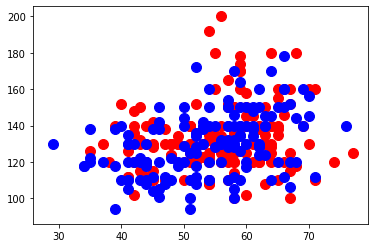

In [22]:
plt.scatter(cleaned_data_noncategorical.values[y_hc == 0,0], cleaned_data_noncategorical.values[y_hc == 0,1], s =100, c='red', label='Cluster 1')
plt.scatter(cleaned_data_noncategorical.values[y_hc == 1,0], cleaned_data_noncategorical.values[y_hc == 1,1], s =100, c='blue', label='Cluster 2')
plt.show()

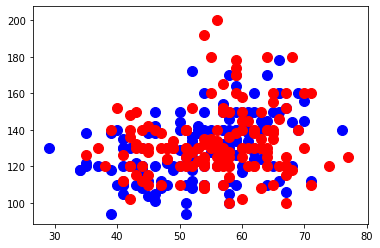

In [23]:
plt.scatter(cleaned_data_noncategorical.values[y_hc == 1,0], cleaned_data_noncategorical.values[y_hc == 1,1], s =100, c='blue', label='Cluster 2')
plt.scatter(cleaned_data_noncategorical.values[y_hc == 0,0], cleaned_data_noncategorical.values[y_hc == 0,1], s =100, c='red', label='Cluster 1')
plt.show()

Not much can be drawn from these Hierarchical Clusters. No clear distinction. 

### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

I will be testing for a linear regression for "Age" and "serum cholestoral in mg/dl", with "Age" being the independent variable and "serum cholestoral in mg/dl" being the dependent variable.

In [25]:
LinReg_X = np.asarray(np.asmatrix(cleaned_data_noncategorical.iloc[:,0]).T)
LinReg_Y = np.asarray(np.asmatrix(cleaned_data_noncategorical.iloc[:,4]).T)

reg = LinearRegression()
reg.fit(LinReg_X,LinReg_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
reg.coef_

array([[0.02540065]])

In [27]:
reg.intercept_

array([-0.32984895])

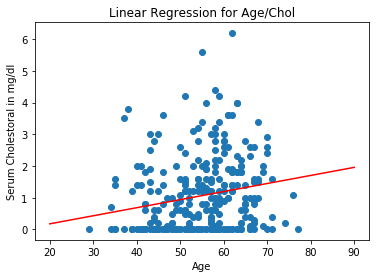

In [28]:
x_test = np.linspace(20,90)
y_pred = reg.predict(x_test[:,None])


plt.scatter(LinReg_X, LinReg_Y)
plt.plot(x_test,y_pred,color='red')
plt.xlabel("Age")
plt.ylabel("Serum Cholestoral in mg/dl")
plt.title("Linear Regression for Age/Chol")
plt.show()

Plotting "Age x Chol" along with their line of Linear Regression, produces the above plot. Their appears to be a weak linear relation between "Age" and "Chol", so the line of linear regression might not be the best (a strong) predictor of values.

Now, I will test:

Independent: (trestbps) resting blood pressure (in mm Hg on admission to the hospital)
Dependent: (thalach) maximum heart rate achieved

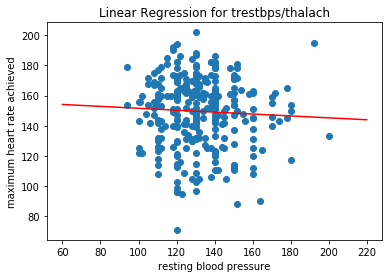

In [29]:
LinReg_X2 = np.asarray(np.asmatrix(cleaned_data_noncategorical.iloc[:,1]).T)
LinReg_Y2 = np.asarray(np.asmatrix(cleaned_data_noncategorical.iloc[:,3]).T)

reg = LinearRegression()
reg.fit(LinReg_X2,LinReg_Y2)

x_test2 = np.linspace(60,220)
y_pred2 = reg.predict(x_test2[:,None])


plt.scatter(LinReg_X2, LinReg_Y2)
plt.plot(x_test2,y_pred2,color='red')
plt.xlabel("resting blood pressure")
plt.ylabel("maximum heart rate achieved")
plt.title("Linear Regression for trestbps/thalach")
plt.show()

Still a weak correlation.

### LDA

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [31]:
cleaned_data_noncategorical.head()

,age,trestbps,chol,thalach,oldpeak,ca
0,63,145,233,150,2.3,0
1,67,160,286,108,1.5,3
2,67,120,229,129,2.6,2
3,37,130,250,187,3.5,0
4,41,130,204,172,1.4,0


In [32]:
#X_lda = cleaned_data.iloc[:, :-1]
X_lda = cleaned_data_noncategorical
Y_lda = cleaned_data.iloc[:,[13]]
Y_lda = np.asarray(Y_lda.T)[0].tolist()

lda = LDA(n_components=2)
X_lda_r2 = lda.fit(X_lda,Y_lda).transform(X_lda)

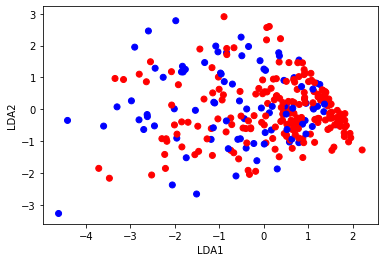

In [33]:
lda_colors = ['red','blue']
vectorizer = np.vectorize(lambda x: lda_colors[x % len(lda_colors)])

plt.scatter(X_lda_r2[:,0],X_lda_r2[:,1],c=vectorizer(Y_lda))
plt.xlabel("LDA1")
plt.ylabel("LDA2")
plt.show()

There is no clear grouping in the above LDA plot, but it does seem that the 'red' points are more concentrated to the right.

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
#X_logR = cleaned_data.iloc[:, :-1]
X_logR = cleaned_data_noncategorical
Y_logR = cleaned_data.iloc[:,[13]]
Y_logR = np.asarray(Y_logR.T)[0].tolist()

logR = LogisticRegression(random_state=1).fit(X_logR,Y_logR)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [36]:
logR.predict_proba(X_logR)

array([[0.5888344 , 0.18621829, 0.11007119, 0.08174265, 0.03313348],
       [0.00696705, 0.20598881, 0.30106891, 0.3795185 , 0.10645674],
       [0.0801768 , 0.18983535, 0.30726019, 0.25713977, 0.16558789],
       ...,
       [0.04979767, 0.16822997, 0.25164105, 0.33704632, 0.19328498],
       [0.29513909, 0.25797227, 0.15203355, 0.21211754, 0.08273755],
       [0.76129077, 0.15759613, 0.03733299, 0.03051861, 0.01326151]])

Each column in each row in this array corresponds to the non-categorical column names (age,trestbps,chol,thalach, oldpeak, and ca). 

### ANN

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [38]:
ann_x = cleaned_data_noncategorical
ann_y = cleaned_data.iloc[:,[13]]

x_train, x_test, y_train, y_test = train_test_split(ann_x, ann_y, test_size=0.2, random_state=1)
ann=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(10,15),random_state=1)
ann.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 15), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [39]:
predict_ann=ann.predict(x_test)
answers_ann=y_test.values

In [40]:
count_ann = 0
for i in range(len(predict_ann)):
    if predict_ann[i]==answers_ann[i]:
        count_ann =count_ann +1

print('Accuracy: ',count_ann/len(predict_ann))

Accuracy:  0.5


Training my neural network this way resulted in an accuracy of 0.5